# Superdense coding

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

In [2]:
c = "1"
d = "0"

In [3]:
protocol = QuantumCircuit(2)

protocol.h(0)
protocol.cx(0, 1)

protocol.barrier()

if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)

protocol.barrier()

protocol.cx(0, 1)
protocol.h(0)

protocol.measure_all()

In [4]:
display(protocol.draw())

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 10 with frequency 1.0


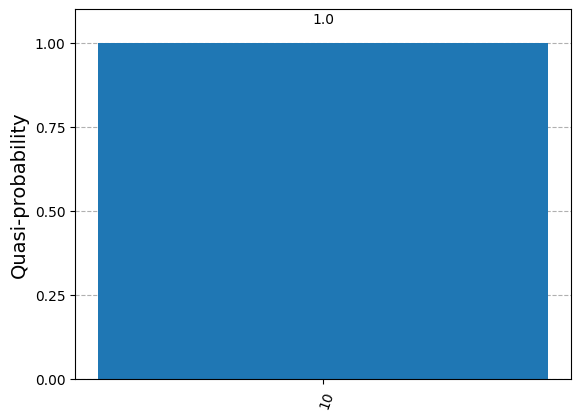

In [5]:
result = Sampler().run(protocol).result()

binary_probabilities = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in binary_probabilities.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(binary_probabilities))